In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bg = '#11134A'
accent = '#202289'
txt = '#FAF9F1'

mpl.rcParams['text.color'] = txt
mpl.rcParams['axes.labelcolor'] = txt
mpl.rcParams['xtick.color'] = txt
mpl.rcParams['ytick.color'] = txt
mpl.rcParams['axes.facecolor'] = bg
mpl.rcParams['axes.edgecolor'] = txt

In [3]:
csv_name = 'Ravenna-2021-'
month_dict = {'1': 'january',
              '2': 'february',
              '3': 'march',
              '4': 'april',
              '5': 'may',
              '6': 'june',
              '7': 'july',
              '8': 'august',
              '9': 'september',
              '10': 'october',
              '11': 'november',
              '12': 'december'}

temperature = pd.DataFrame( {'DATA': [], 'TMEDIA': [], 'MESE': []} )

In [4]:
def data_cleaner(current):
    global csv_name
    global temperature
    df = pd.read_csv( '../../data/meteo/' + csv_name + current + '.csv' )
    df = df[['DATA', 'TMEDIA']]
    df_date = df['DATA'].str.split('/', expand = True)
    df_date = df_date.rename( columns = { 0: 'day', 1: 'month', 2: 'year' })
    df['MESE'] = df_date['month']
    df_date = pd.to_datetime(df_date)
    df['DATA'] = df_date
    df['MESE'] = df['MESE'].map(month_dict)
#     print(df.head(2))
#     print(df.shape)
    temperature = pd.concat([temperature, df], ignore_index = True )
#     print(type(jan['MESE'][1]))
#     print(jan.head(3))

In [5]:
mesi = ['Gennaio',  'Febbraio', 'Marzo', 'Aprile', 'Maggio', 'Giugno', 'Luglio', 'Agosto', 'Settembre', 'Ottobre', 'Novembre', 'Dicembre']
for mese in mesi:
    data_cleaner(mese)

In [6]:
month_mean_serie = temperature.groupby('MESE')['TMEDIA'].mean()
temperature['TMEDIA_MESE'] = temperature['MESE'].map(month_mean_serie)
print(temperature)

                    DATA  TMEDIA      MESE  TMEDIA_MESE
0    2021-01-01 00:00:00     7.0   january     3.833333
1    2021-01-02 00:00:00     7.0   january     3.833333
2    2021-01-03 00:00:00     8.0   january     3.833333
3    2021-01-04 00:00:00     4.0   january     3.833333
4    2021-01-05 00:00:00     5.0   january     3.833333
..                   ...     ...       ...          ...
360  2021-12-27 00:00:00     7.0  december     4.387097
361  2021-12-28 00:00:00     7.0  december     4.387097
362  2021-12-29 00:00:00     6.0  december     4.387097
363  2021-12-30 00:00:00     5.0  december     4.387097
364  2021-12-31 00:00:00     3.0  december     4.387097

[365 rows x 4 columns]


In [7]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

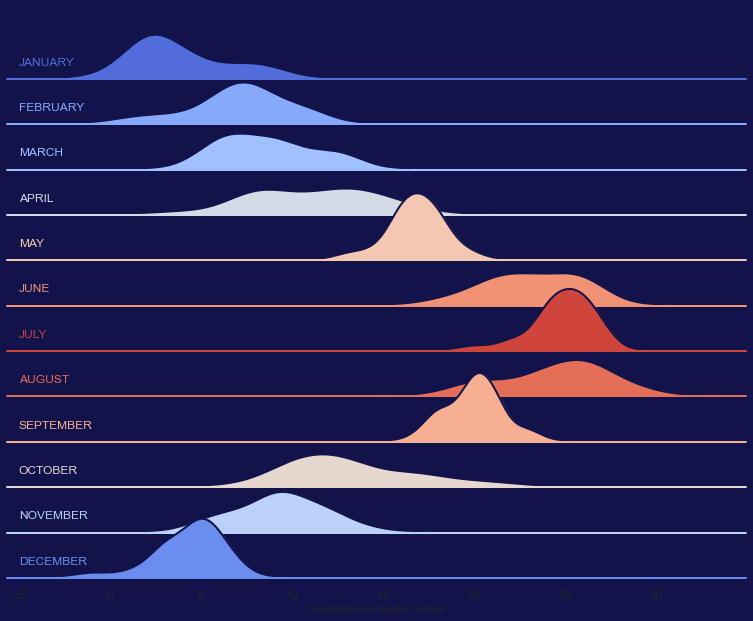

In [8]:
pal = sns.color_palette( palette = 'coolwarm', n_colors = 12 )

g = sns.FacetGrid(temperature, 
                  row = 'MESE', 
                  hue = 'TMEDIA_MESE', # argument that will be represented by colors with 'palette'
                  aspect = 15, 
                  height = 0.75, 
                  palette = pal
                 )

g.map(sns.kdeplot, # densities
      'TMEDIA', 
      bw_adjust = 1, 
      clip_on = False, 
      fill = True, 
      alpha = 1, 
      linewidth = 1.5
     )

g.map(sns.kdeplot, # white border
      'TMEDIA', 
      bw_adjust = 1, 
      clip_on = False, 
      color = bg, 
      lw = 2
     ) 

# horizontal line
g.map(plt.axhline, 
      y = -0.005, # avoid density showing below the line
      lw = 2, 
      clip_on = False
     )

for i, ax in enumerate(g.axes.flat): # loop over the FacetGrid figure axes (g.axes.flat)
    ax.text(-5, 
            0.05, 
            month_dict[str(i+1)].upper(), # add the month as text
            fontsize = 12,
            color = ax.lines[-1].get_color() # with the right color
           ) # -1 to access the last line's color in each matplotlib.Axes

g.fig.subplots_adjust( hspace = -0.4 ) # overlap subplots

g.set_titles('')
g.set( yticks = [] )
g.set( ylabel = None )
g.despine( bottom = True, 
          left = True 
         )

plt.setp( ax.get_xticklabels(), 
         fontsize = 12 
        )
plt.xlabel('Temperature in degree Celsius', 
           fontsize = 10
          )

g.fig.patch.set_facecolor(bg)

# plt.savefig( 'temperature.jpg', dpi = 150 )